In [11]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [3]:
TEST_IMAGES_PATH = "../phase_2/data/test2014/test2014"  # Directory with training images
CAPTIONS_PATH = "../phase_1/data/flickr30k_images/results_validation.csv"  # Caption file

In [5]:
from torch.utils.data import Dataset
from PIL import Image
import torchvision.transforms as transforms

from torch.nn.utils.rnn import pad_sequence
import torch

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(), 
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])


In [7]:
@torch.no_grad()
def generate_caption_transformer(image, encoder, decoder, vocab, max_len=30):
    encoder.eval()
    decoder.eval()

    bos = vocab.word2idx["<start>"]
    eos = vocab.word2idx["<end>"]

    image = image.unsqueeze(0).to(device)
    memory = encoder(image)  # [1, N, D]

    generated = torch.tensor([[bos]], device=device)

    for _ in range(max_len - 1):
        logits = decoder(memory, generated)      # [1, t, V]
        next_token = logits[:, -1].argmax(dim=-1, keepdim=True)  # [1,1]
        generated = torch.cat([generated, next_token], dim=1)

        if next_token.item() == eos:
            break

    words = []
    for idx in generated.squeeze(0).tolist():
        w = vocab.idx2word[idx]
        if w in ("<start>", "<pad>"):
            continue
        if w == "<end>":
            break
        words.append(w)

    return " ".join(words)

In [12]:
from model import TransformerEncoderViT
from model import TransformerDecoder

vocab = torch.load("models/vocab.pkl", weights_only=False)
encoder = TransformerEncoderViT(256).to(device)
decoder = TransformerDecoder(embed_size=256, vocab_size=len(vocab)).to(device)

encoder.load_state_dict(torch.load("models/encoder.pth", map_location=device))
decoder.load_state_dict(torch.load("models/decoder.pth", map_location=device))

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


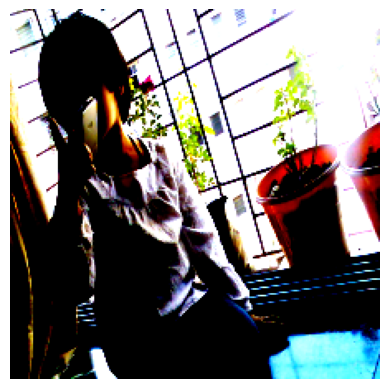

/home/madhu-thiramdas/ai-work/ai-venv-py310/lib/python3.10/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.622571].


Image: 000000001751.jpg
Caption: a woman is sitting on a couch with a cell phone .



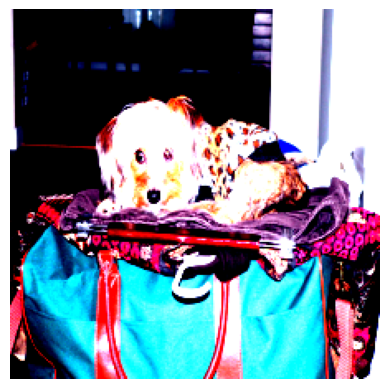

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.622571].


Image: 000000001192.jpg
Caption: a dog laying on a chair with a dog .



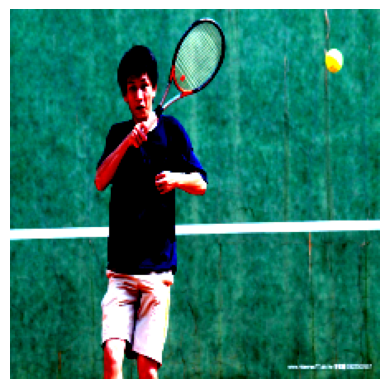

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9831933..2.64].


Image: 000000001097.jpg
Caption: a man is playing tennis with a tennis racket .



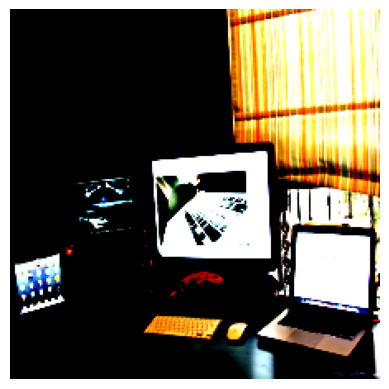

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Image: 000000000509.jpg
Caption: a laptop and a computer monitor on a desk .



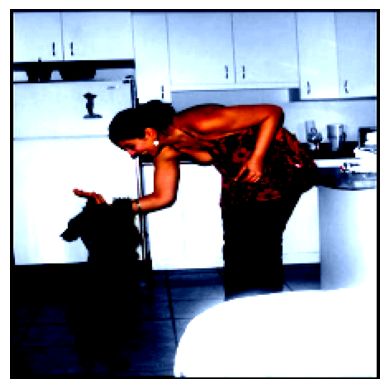

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6051416].


Image: 000000000674.jpg
Caption: a woman is standing in a kitchen with her hair .



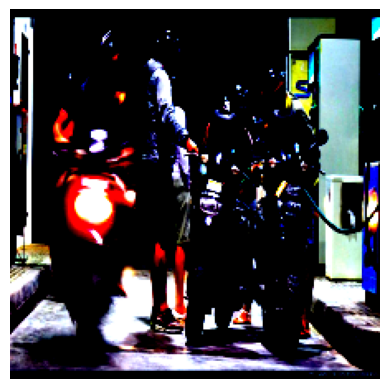

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.6051416].


Image: 000000001492.jpg
Caption: a man riding a motorcycle with a man riding a man on a city street .



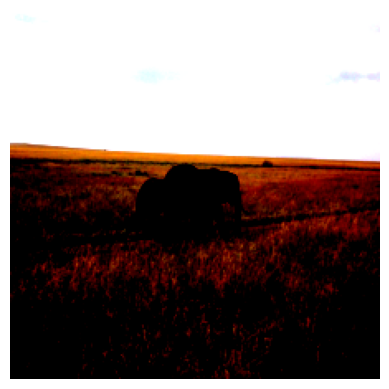

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.2146587].


Image: 000000001266.jpg
Caption: a herd of elephants walking across a grassy field .



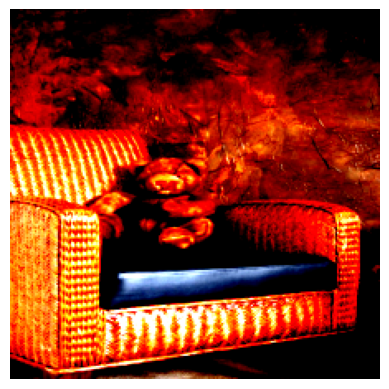

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.186841].


Image: 000000001172.jpg
Caption: a large brown teddy bear sitting on a chair .



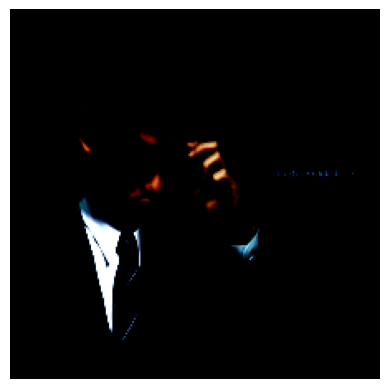

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5877128].


Image: 000000000171.jpg
Caption: a man in a suit and tie and a tie



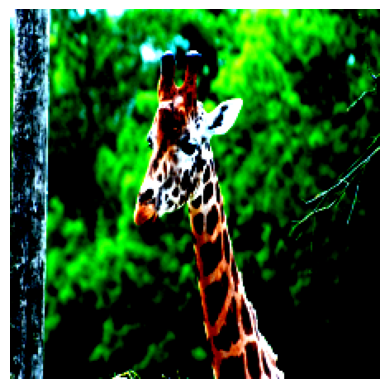

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].


Image: 000000000229.jpg
Caption: a giraffe is standing in a grassy area .



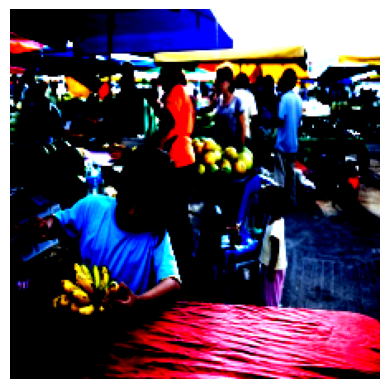

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.64].


Image: 000000000619.jpg
Caption: a woman sitting at a table with a bunch of fruits and vegetables .



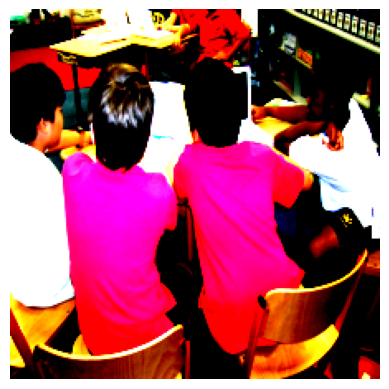

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8781574..1.0539435].


Image: 000000000345.jpg
Caption: a group of people are sitting at a table .



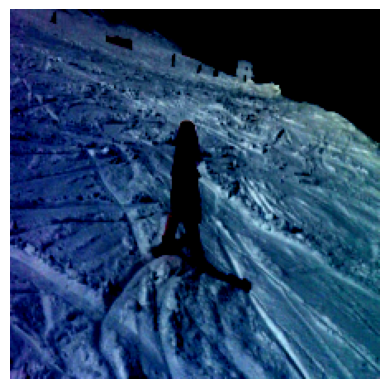

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8781512..2.2391288].


Image: 000000000408.jpg
Caption: a man in a red jacket skiing down a snowy hill .



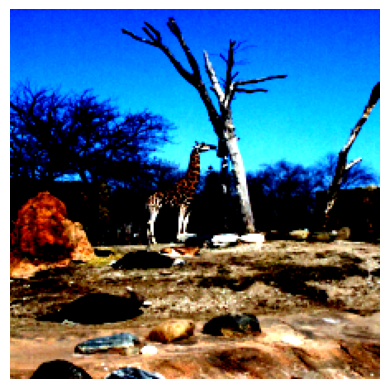

Image: 000000000953.jpg
Caption: a giraffe is standing in a field with trees in the background .



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8096584..2.64].


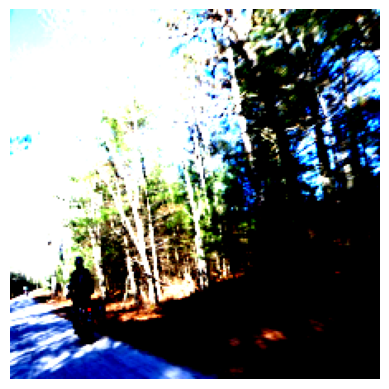

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.622571].


Image: 000000000979.jpg
Caption: a person riding a motorcycle on the side of a road .



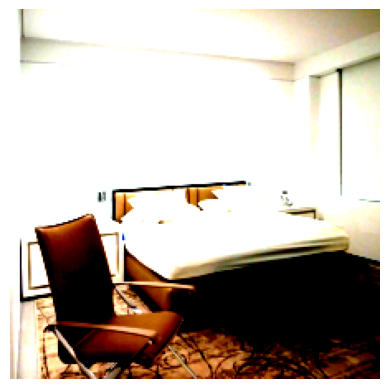

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6051416].


Image: 000000001194.jpg
Caption: a bed sitting on a bed in a room .



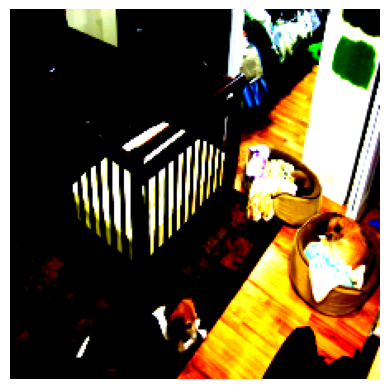

Image: 000000001257.jpg
Caption: a dog laying on a bed with a dog .



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


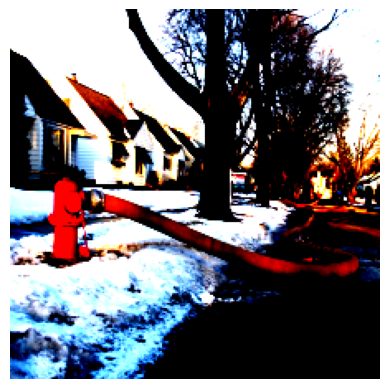

Image: 000000000549.jpg
Caption: a fire hydrant sitting on a sidewalk next to a fire hydrant .



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9637812..2.64].


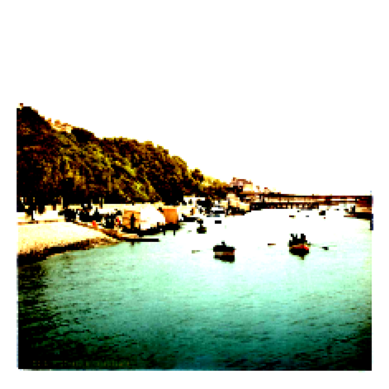

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.64].


Image: 000000000416.jpg
Caption: a group of people are in the water .



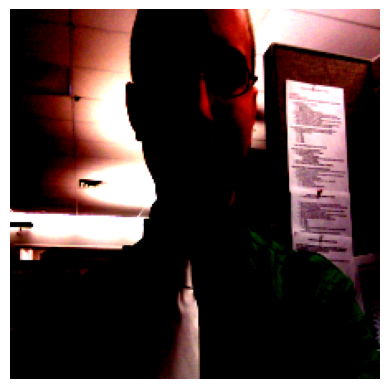

Image: 000000001418.jpg
Caption: a man in a suit and a tie and a tie



In [13]:
import os
import matplotlib.pyplot as plt
from PIL import Image

for file_name in os.listdir(TEST_IMAGES_PATH)[:20]:
    # Load image
    img_path = f"{TEST_IMAGES_PATH}/{file_name}"
    image = Image.open(img_path).convert("RGB")

    image = transform(image)
    plt.imshow(image.permute(1, 2, 0).cpu().numpy())
    plt.axis('off')
    plt.show()
    
    caption = generate_caption_transformer(image, encoder, decoder, vocab)
    print(f"Image: {file_name}\nCaption: {caption}\n")